You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
## descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### The mininum of all the features is zero its something wrong because Glucose and Bloodpressure and other features cannot be zero

In [7]:
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].mean())
df['Age'] = df['Age'].replace(0,df['Age'].mean())
df['Outcome'] = df['Outcome'].replace(0,df['Outcome'].mean())

In [8]:
## Visulazations for the distrubi=utions
import seaborn as sns
corr = df.corr()

In [9]:
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261,0.247971
Glucose,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.247971,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


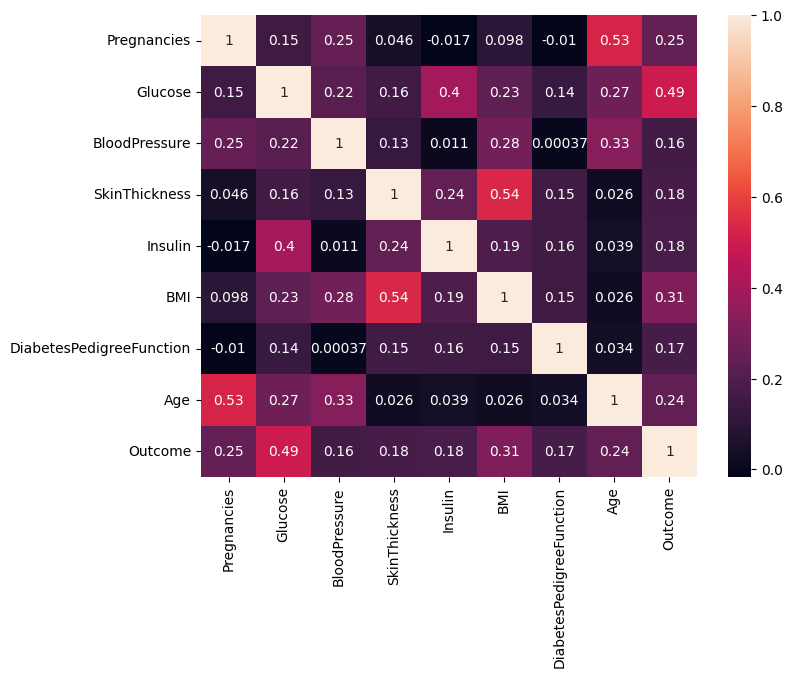

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
## Handling missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#### Here There is no missing values or null values in the dataset.

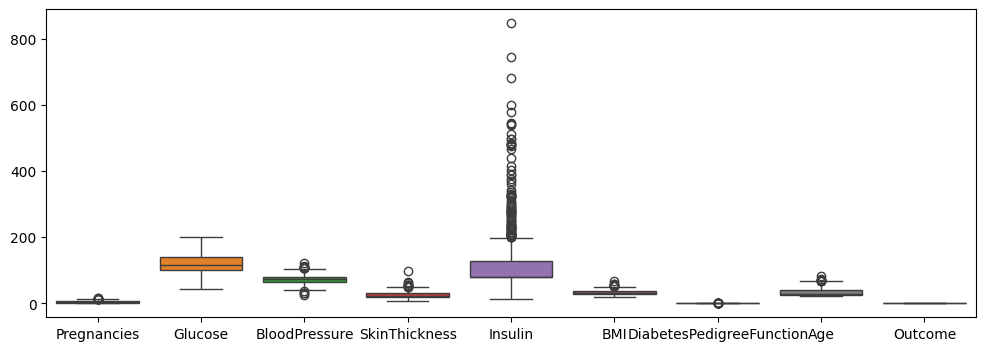

In [12]:
## Handling the outliers for finding the outliers we have to udse the box plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,4))
sns.boxplot(data=df)
plt.show()

### Here there is no categirical variables all are numerical values only

In [13]:
df.shape

(768, 9)

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
x,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
 0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
 1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
 2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
 3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
 4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
 ..           ...      ...            ...            ...         ...   ...   
 763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
 764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
 765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
 766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
 767     1.000000     93.0           70.0      31.000000   79.799479  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                      

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()

In [23]:
classifier

DecisionTreeRegressor()

In [24]:
classifier.fit(x_train,y_train)

DecisionTreeRegressor()

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
y_pred

array([0.34895833, 0.34895833, 0.34895833, 0.34895833, 0.34895833,
       0.34895833, 0.34895833, 1.        , 1.        , 1.        ,
       0.34895833, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.34895833, 0.34895833, 1.        , 1.        ,
       1.        , 0.34895833, 0.34895833, 0.34895833, 0.34895833,
       1.        , 0.34895833, 0.34895833, 0.34895833, 0.34895833,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.34895833, 0.34895833,
       0.34895833, 0.34895833, 1.        , 1.        , 0.34895833,
       1.        , 1.        , 0.34895833, 0.34895833, 1.        ,
       0.34895833, 1.        , 1.        , 0.34895833, 0.34895833,
       0.34895833, 0.34895833, 0.34895833, 0.34895833, 1.        ,
       1.        , 0.34895833, 0.34895833, 0.34895833, 0.34895833,
       1.        , 0.34895833, 1.        , 0.34895833, 1.        ,
       0.34895833, 0.34895833, 0.34895833, 0.34895833, 0.34895

In [31]:
parameter = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['sqrt','log2']
}

In [32]:
from sklearn.model_selection import GridSearchCV
gidcv = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [33]:
gidcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [34]:
gidcv.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [37]:
y_pred = gidcv.predict(x_test)
y_pred

array([0.88775144, 0.38271605, 0.38271605, 0.5086478 , 0.75288929,
       0.88775144, 0.38271605, 0.75288929, 0.75288929, 0.75288929,
       0.5086478 , 0.75288929, 0.6021412 , 0.40210459, 0.38271605,
       0.38271605, 0.57650688, 0.57650688, 0.75288929, 0.57650688,
       0.75288929, 0.40210459, 0.75288929, 0.38271605, 0.75288929,
       0.75288929, 0.38881803, 0.38271605, 0.38271605, 0.40210459,
       0.57650688, 0.75288929, 1.        , 0.75288929, 0.75288929,
       0.88775144, 0.75288929, 0.75288929, 0.5086478 , 0.57650688,
       0.38881803, 0.5086478 , 0.75288929, 0.75288929, 0.38881803,
       0.57650688, 0.88775144, 0.57650688, 0.5086478 , 1.        ,
       0.38881803, 0.6021412 , 0.88775144, 0.38271605, 0.38881803,
       0.38881803, 0.75288929, 0.57650688, 0.38271605, 0.75288929,
       0.75288929, 0.38271605, 0.6021412 , 0.6021412 , 0.57650688,
       0.57650688, 0.38271605, 0.75288929, 0.38881803, 0.8046875 ,
       0.88775144, 0.40210459, 0.609375  , 0.57650688, 0.50864

In [43]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))


-1.541154357007502
